# Mini-EDA with a small amount of data (part 1 of Steam EDA)

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Preview of this notebook:
- computing some summary stats
- missing data percentage 
- mean price and standard deviation across games (for one time period) and across time, as a time series (for one game). 

In [4]:
us_0329 = pd.read_csv("top_sellers_20230329_US.csv")
us_0330 = pd.read_csv("top_sellers_20230330_US.csv")
us_0331 = pd.read_csv("top_sellers_20230331_US.csv")

#Add date (for now, there are only 3, but the RHS of the following code needs to be automated.)
us_0329["date"]=29
us_0330["date"]=30
us_0331["date"]=31

us_3 = pd.concat([us_0329, us_0330, us_0331])
us_0329

,Unnamed: 0,title,rank_no,price,appid,bundleid,crtrids,date
0,0,b'Counter-Strike: Global Offensive',1,1499,730,NaN,[4],29
1,1,b'Resident Evil 4',2,5999,2050650,NaN,[34827950],29
2,2,b'Apex Legends',3,0,1172470,NaN,"[37913704,36135791,38963503]",29
3,3,b'Steam Deck',4,39900,1675200,NaN,[4],29
4,4,b'Destiny 2',5,0,1085660,NaN,[],29
...,...,...,...,...,...,...,...,...
9214,9214,b'Sacred Zodongga Defense',9215,1199,2223350,NaN,[43709116],29
9215,9215,"b""Don't Starve Together: Hallowed Nights Survi...",9216,999,1447360,NaN,[112393],29
9216,9216,b'Mortal Kombat 11 Masquerade Skin Pack',9217,599,1160243,NaN,[34133273],29
9217,9217,b'WGT Golf - Eagle Bundle',9218,999,1354410,NaN,[],29


In [5]:
#Drop unnecessary columns + get rid of b'' for title
us_03 = us_3.drop(columns=["Unnamed: 0", "bundleid", "crtrids"])
us_03["title"] = us_03["title"].str[2:-1]
us_03

,title,rank_no,price,appid,date
0,Counter-Strike: Global Offensive,1,1499,730,29
1,Resident Evil 4,2,5999,2050650,29
2,Apex Legends,3,0,1172470,29
3,Steam Deck,4,39900,1675200,29
4,Destiny 2,5,0,1085660,29
...,...,...,...,...,...
9425,Arcane Waters,9426,1999,1266340,31
9426,Rare Weapons Set B (The Kinugawa Crazies),9427,399,333814,31
9427,Tales of Arise - Premium Costume Pack,9428,1499,1202031,31
9428,Nitro Kid,9429,1999,1709050,31


In [6]:
#Check for missing rows
us_03[pd.isnull(us_03).any(axis=1)].shape[0]/ len(us_0329) * 100

0.0

None of the rows are missing :)

In [7]:
#Example of a game. Its rank changes over the three days, but the price stays the same.
us_03[us_03["title"] == "theHunter: Call of the Wild - Yukon Valley"]

,title,rank_no,price,appid,date
2477,theHunter: Call of the Wild - Yukon Valley,2478,799,1093700,29
2321,theHunter: Call of the Wild - Yukon Valley,2322,799,1093700,30
2276,theHunter: Call of the Wild - Yukon Valley,2277,799,1093700,31


In [8]:
#Grouped data where the price is not grouped
prices = us_03.groupby(by=["title"]).agg({'price': list})
prices

,price
title,
(Night of Full Moon),"[0, 0]"
Bloody Spell,"[2499, 2499, 2499]"
Fieldrunners 2,[999]
Nekojishi,[0]
Tale of Immortal,"[1999, 1999]"
...,...
theHunter: Call of the Wild - Weapon Pack 3,"[399, 399, 399]"
theHunter: Call of the Wild - Wild Goose Chase Gear,"[399, 399, 399]"
theHunter: Call of the Wild - Yukon Valley,"[799, 799, 799]"


In [9]:
#Grouped data, in order of average rank
us_03_avg = us_03.groupby(by=["title"]).agg("mean").sort_values(by = "rank_no")
us_03_avg

,rank_no,price,appid,date
title,,,,
Counter-Strike: Global Offensive,1.000000,1499.0,730.0,30.0
Resident Evil 4,2.000000,5999.0,2050650.0,30.0
Steam Deck,3.333333,39900.0,1675200.0,30.0
Destiny 2,4.666667,0.0,1085660.0,30.0
Apex Legends,5.000000,0.0,1172470.0,30.0
...,...,...,...,...
IL-2 Sturmovik: Hurricane Mk.II Collector Plane,9423.000000,1999.0,1467121.0,31.0
Roundguard,9425.000000,1999.0,848030.0,31.0
Arcane Waters,9426.000000,1999.0,1266340.0,31.0


In [10]:
#Some games are very expensive! mean ~= sd so most values are clustered near the mean. 
#The date has no significance (I just didn't take it out).
us_03_avg.describe()

,rank_no,price,appid,date
count,13013.000000,13013.000000,1.301300e+04,13013.000000
mean,5322.859724,1443.139021,1.085684e+06,30.012443
std,2571.644487,1430.656252,6.369249e+05,0.517013
min,1.000000,0.000000,1.000000e+01,29.000000
25%,3352.000000,499.000000,5.240800e+05,30.000000
50%,5747.000000,999.000000,1.075041e+06,30.000000
75%,7441.500000,1999.000000,1.591520e+06,30.000000
max,9430.000000,49900.000000,2.373660e+06,31.000000


## Only 12 games are very expensive. Most of these are not games either (ex. Steam Deck)

In [11]:
us_03_avg[us_03_avg["price"] > 10000]

,rank_no,price,appid,date
title,,,,
Steam Deck,3.333333,39900.0,1675200.0,30.0
Valve Index Headset,21.000000,49900.0,1059530.0,30.0
Valve Index Base Station,157.666667,14900.0,1059570.0,30.0
Valve Index Controllers,173.000000,27900.0,1059550.0,30.0
Valve Index Replacement Tether,446.000000,12900.0,1634050.0,30.0
Substance 3D Painter 2023,521.666667,14999.0,2199970.0,30.0
Substance 3D Designer 2023,1635.000000,14999.0,2200010.0,29.5
Fantasy Grounds Unity - Ultimate License Upgrade,2215.000000,10999.0,1396780.0,30.0
VEGAS Edit 20 Steam Edition,2668.000000,24900.0,2070990.0,29.0


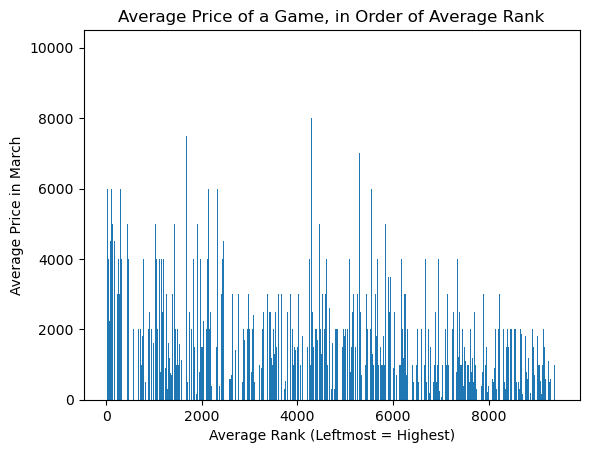

In [12]:
#Take out the expensive outliers
us_03_avg_cheap = us_03_avg[us_03_avg["price"] < 10000]

#and make a bar plot
plt.bar(us_03_avg_cheap["rank_no"], us_03_avg_cheap["price"])
plt.title('Average Price of a Game, in Order of Average Rank')
plt.xlabel('Average Rank (Leftmost = Highest)')
plt.ylabel('Average Price in March')
plt.show()

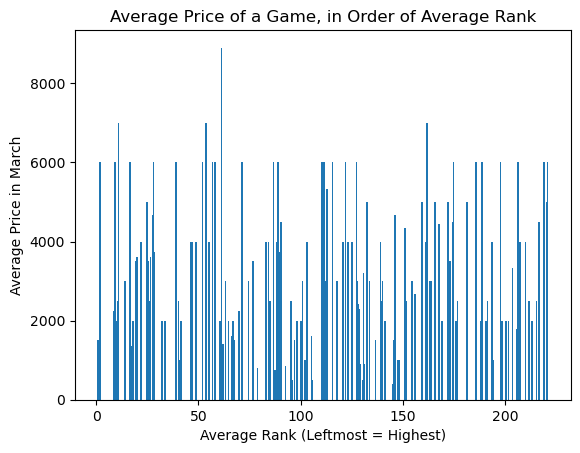

In [13]:
#Version with only top 200 games (average rank)
us_03_avg_cheap_top200 = us_03_avg_cheap.iloc[:200]
plt.bar(us_03_avg_cheap_top200["rank_no"], us_03_avg_cheap_top200["price"])
plt.title('Average Price of a Game, in Order of Average Rank')
plt.xlabel('Average Rank (Leftmost = Highest)')
plt.ylabel('Average Price in March')
plt.show()

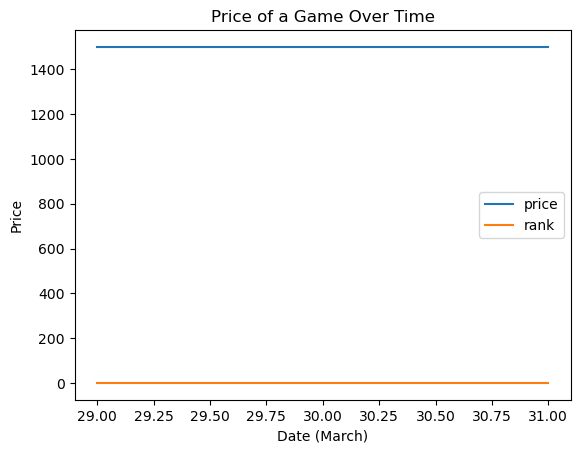

In [14]:
#Grouped data where the date is not grouped

#The #1 game over the 3 days was Counter Strike:
cs = us_03[us_03["title"] == "Counter-Strike: Global Offensive"]
plt.plot(cs["date"], cs["price"], label = "price")
plt.plot(cs["date"], cs["rank_no"], label = "rank")
plt.title('Price of a Game Over Time')
plt.xlabel('Date (March)')
plt.ylabel('Price')

plt.legend()
plt.show()

#Right now the x-axis is continuous, but once the dates are automated, I would import datetime which converts the 
#column into a date object instead of regular numbers (and therefore the x-axis would not be continuous)
#ex. 29, 30, 31 instead of 29.00, 29.25, etc

### **This time series graph is uninformative.** 
#### The main reason for this is that the timespan for this graph is only 3 days, in which the price of games likely didn't change. Once more data is added (not just 3 days), this time series may change. Also, Right now the x-axis is continuous (ex. 29.00 instead of 29), but once the dates are automated, I would import datetime which converts the column into a date object instead of regular numbers (and therefore the x-axis would not be continuous)

# Aside: Distribution of how long games were in the ranking

### Retrieving the Data using SQL

**SQL Code to get US_rankings.csv:**

WITH num_scraped AS (select count(distinct date_scraped) AS dates,appid 
                     FROM country_top_sellers.US_top_sellers group by appid)
                     
SELECT count(distinct appid) AS count_apps, dates AS num_date_obs FROM num_scraped group by dates ORDER BY dates

In [19]:
data = pd.read_csv("US_rankings.csv")
data.head()

,count_apps,num_date_obs
0,4861,1
1,2716,2
2,1730,3
3,1202,4
4,975,5


<Axes: xlabel='num_date_obs', ylabel='count_apps'>

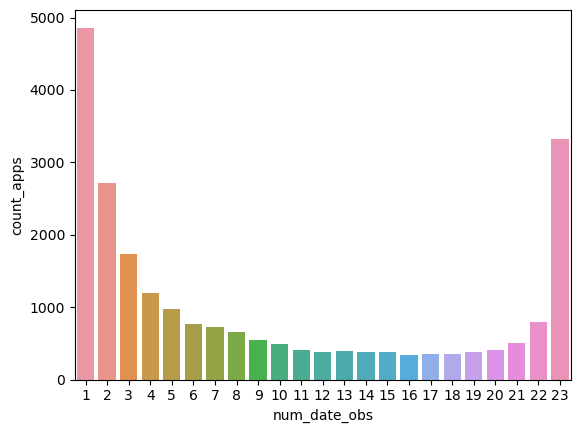

In [20]:
sns.barplot(data=data, x="num_date_obs", y="count_apps")

Findings / Questions for the future:
- There are many games that were only in the ranking for 1 day as well as 23 days 
- why are they only there for 1 day? 
- what is the average ranking of games we only observed once